<a href="https://colab.research.google.com/github/GaneshiUmayangana/KNN_Example/blob/main/KNNExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data =pd.DataFrame({
    'X1' : [51,62,69,64,65,56,58,57,55],
    'X2' : [167,182,176,173,172,174,169,173,170],
    'Class' : [1,2,2,2,2,1,2,2,1]
})

In [ ]:
# Point to classify
point = np.array([57, 170])



In [ ]:
# Calculate Euclidean distances
distances = np.sqrt((data['X1'] - point[0])**2 + (data['X2'] - point[1])**2)
distances


0     6.708204
1    13.000000
2    13.416408
3     7.615773
4     8.246211
5     4.123106
6     1.414214
7     3.000000
8     2.000000
dtype: float64

In [ ]:
# Add distances to the dataframe
data['Distance'] = distances

# Find the 3 nearest neighbors
nearest_neighbors = data.nsmallest(3, 'Distance')
nearest_neighbors


,X1,X2,Class,Distance
6,58,169,2,1.414214
8,55,170,1,2.000000
7,57,173,2,3.000000


In [ ]:
# Determine the majority class
majority_class = nearest_neighbors['Class'].mode()[0]

# Output the result
print("The point", point, "is classified as class", majority_class)

The point [ 57 170] is classified as class 2


## Using cross validation method and calculate the optimal K valu


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Features and target
X = data[['X1', 'X2']]
y = data['Class']


In [ ]:
# Range of k values to test
k_range = range(1, 20)

# List to store cross-validation scores
cv_scores = []

# Perform 5-fold cross-validation for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Find the optimal k
optimal_k = k_range[cv_scores.index(max(cv_scores))]



C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selecti

In [ ]:
import matplotlib.pyplot as plt

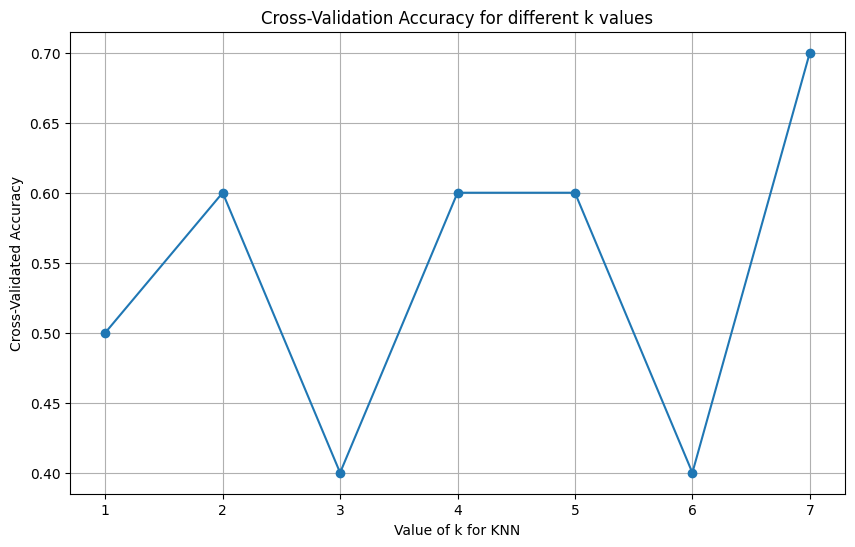

In [ ]:
# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validation Accuracy for different k values')
plt.grid(True)
plt.show()

In [ ]:
# Output the result
print("Cross-validation scores for each k:", cv_scores)
print("The optimal k value is:", optimal_k)

Cross-validation scores for each k: [0.5, 0.6, 0.4, 0.6, 0.6, 0.4, 0.7, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
The optimal k value is: 7


In [ ]:
# Train the KNN classifier with optimal k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X, y)

# Point to classify
point = np.array([[57, 170]])

# Predict the class of the point
predicted_class = knn.predict(point)

# Output the classification result
print("The point", point, "is classified as class", predicted_class[0])

The point [[ 57 170]] is classified as class 2


C:\Users\Ganeshi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
